In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score, accuracy_score
import pickle #me permite guardar objetos de python
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

from pickle import dump
import warnings

warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv('/workspaces/Antonio27M-machine-learning/data/processed/eda_insulina.csv')

In [3]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,20.536458,0.2,0.0,0.304,21
618,9,112,82,24.000000,0.2,28.2,1.282,50
346,1,139,46,19.000000,83.0,28.7,0.654,22
294,0,161,50,20.536458,0.2,21.9,0.254,65
231,6,134,80,37.000000,370.0,46.2,0.238,46


### Decision de decision

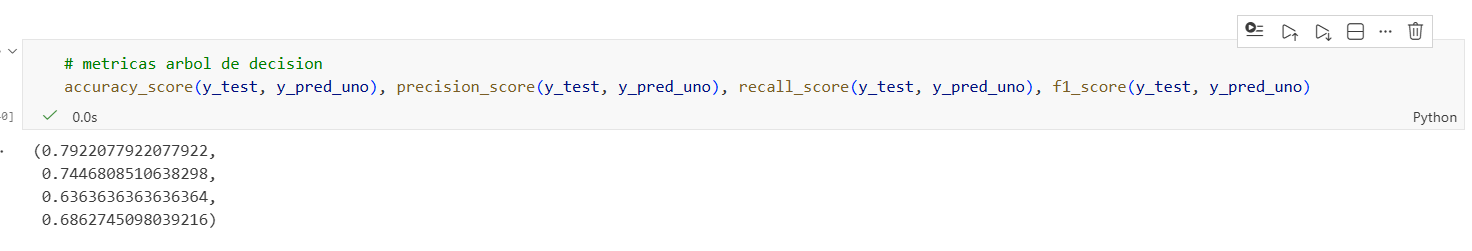

### Random Arbol 

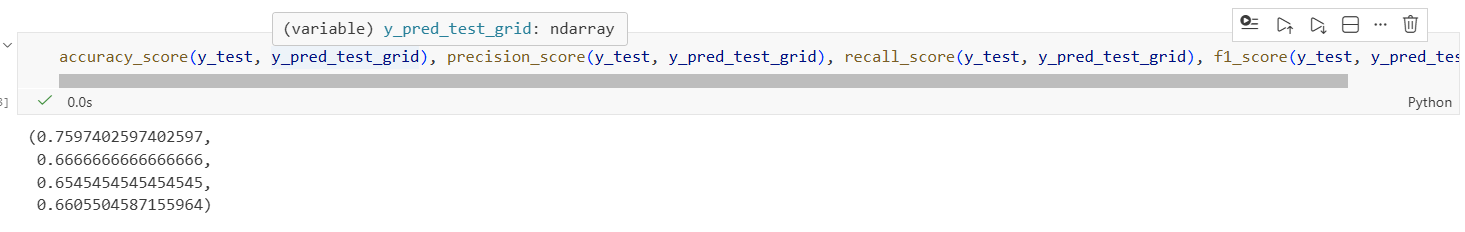

In [4]:

ada = AdaBoostClassifier(n_estimators=100,
                        learning_rate=0.1,
                         random_state=18)
gb = GradientBoostingClassifier(n_estimators=5,
                               learning_rate=0.3,
                               random_state=18)

xgb = XGBClassifier(n_estimators=2,
                   learning_rate=0.2,
                   random_state=18)
lgb = LGBMClassifier(n_estimators=20,
                    learning_rate=0.5,
                    random_state=18)


In [5]:
ada.fit(X_train, y_train), gb.fit(X_train, y_train), xgb.fit(X_train, y_train), lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

(AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=18),
 GradientBoostingClassifier(learning_rate=0.3, n_estimators=5, random_state=18),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.2, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=2,
               n_jobs=None, num_parallel_tree=None, ...),
 LGBMClassifier(learning_rate=0.5, n_estimators=20, random_state=18))

In [6]:
ada_y_pred_test = ada.predict(X_test)
gb_y_pred_test = gb.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)
lgb_y_pred_test = lgb.predict(X_test)

ada_y_pred_train = ada.predict(X_train)
gb_y_pred_train = gb.predict(X_train)
xgb_y_pred_train = xgb.predict(X_train)
lgb_y_pred_train = lgb.predict(X_train)

In [7]:
accuracy_train = (accuracy_score(y_train, ada_y_pred_train),
                  accuracy_score(y_train, gb_y_pred_train),
                  accuracy_score(y_train, xgb_y_pred_train),
                  accuracy_score(y_train, lgb_y_pred_train))
accuracy_test = (accuracy_score(y_test, ada_y_pred_test),
                 accuracy_score(y_test, gb_y_pred_test),
                 accuracy_score(y_test, xgb_y_pred_test),
                 accuracy_score(y_test, lgb_y_pred_test))

accuracy = pd.DataFrame(data=[accuracy_train, accuracy_test],
                        columns=['AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM'],
                        index=['Train set', 'Test set'])

accuracy

,AdaBoost,Gradient Boosting,XGBoost,LightGBM
Train set,0.778502,0.820847,0.773616,1.00000
Test set,0.779221,0.805195,0.746753,0.75974
